In [8]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
upper, middle, lower = ta.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)
df['Upper'] = upper
df['Middle'] = middle
df['Lower'] = lower
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X_U = df[['Upper']].values
X_M = df[['Middle']].values
X_L = df[['Lower']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_U_train, X_U_test, Y_U_train, Y_U_test = train_test_split(X_U, Y, 
                                                    test_size=0.2, shuffle=False,
                                                            random_state=42)

X_M_train, X_M_test, Y_M_train, Y_M_test = train_test_split(X_M, Y, 
                                                    test_size=0.2, shuffle=False,
                                                            random_state=42)

X_L_train, X_L_test, Y_L_train, Y_L_test = train_test_split(X_L, Y, 
                                                    test_size=0.2, shuffle=False,
                                                            random_state=42)

# X 학습 테스트
X_U_train = scaler.fit_transform(X_U_train)
X_U_test = scaler.fit_transform(X_U_test)

X_M_train = scaler.fit_transform(X_M_train)
X_M_test = scaler.fit_transform(X_M_test)

X_L_train = scaler.fit_transform(X_L_train)
X_L_test = scaler.fit_transform(X_L_test)

# Y 학습 테스트
Y_U_train = scaler.fit_transform(Y_U_train.reshape(-1, 1)).flatten()
Y_U_test = scaler.fit_transform(Y_U_test.reshape(-1, 1)).flatten()

Y_M_train = scaler.fit_transform(Y_M_train.reshape(-1, 1)).flatten()
Y_M_test = scaler.fit_transform(Y_M_test.reshape(-1, 1)).flatten()

Y_L_train = scaler.fit_transform(Y_L_train.reshape(-1, 1)).flatten()
Y_L_test = scaler.fit_transform(Y_L_test.reshape(-1, 1)).flatten()


# 전체 비교용 X Y
X_U_scaled = scaler.fit_transform(X_U)
X_M_scaled = scaler.fit_transform(X_M)
X_L_scaled = scaler.fit_transform(X_L)

Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 모델 구축
model_U = LinearRegression()
model_M = LinearRegression()
model_L = LinearRegression()

# 모델 학습
model_U.fit(X_U_train, Y_U_train)
model_M.fit(X_M_train, Y_M_train)
model_L.fit(X_L_train, Y_L_train)

# 테스트 데이터 예측
Y_U_pred = model_U.predict(X_U_test)
Y_M_pred = model_M.predict(X_M_test)
Y_L_pred = model_L.predict(X_L_test)

Y_U_pred_all = model_U.predict(X_U_scaled)
Y_M_pred_all = model_M.predict(X_M_scaled)
Y_L_pred_all = model_L.predict(X_L_scaled)

# 예측 결과 역스케일링
Y_U_pred_scaled = scaler.inverse_transform(Y_U_pred.reshape(-1, 1)).flatten()
Y_U_pred_scaled_all = scaler.inverse_transform(Y_U_pred_all.reshape(-1, 1)).flatten()

Y_M_pred_scaled = scaler.inverse_transform(Y_M_pred.reshape(-1, 1)).flatten()
Y_M_pred_scaled_all = scaler.inverse_transform(Y_M_pred_all.reshape(-1, 1)).flatten()

Y_L_pred_scaled = scaler.inverse_transform(Y_L_pred.reshape(-1, 1)).flatten()
Y_L_pred_scaled_all = scaler.inverse_transform(Y_L_pred_all.reshape(-1, 1)).flatten()

Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_U_pred_scaled)
print(Y_M_pred_scaled)
print(Y_L_pred_scaled)

[77586409.70345522 75290662.76999898 72996856.88055173 72659709.22511928
 71557272.73973611 70820880.67030798 69706959.35585302 68709080.59505506
 68754765.1828092  68707824.21875493 68334730.72825639 68409420.86606705
 68719933.18642284 69155535.35318635 69692850.57271606 70511223.41217548
 72561290.01956831 73431069.07100676 74133309.82587296 74900163.82394911
 75198416.78143318 74985248.01569884 74022944.42688355 73684214.44556077
 72707605.96141283 71579915.86146906 70117327.04477762 68672252.23852637
 66813287.86581431 64456088.89747971 62211520.80644909 58164569.37162563
 55371649.0789758  52374803.60637549 49001820.39478319 46069255.24940048
 45364818.49126613 44727951.3258011  44575109.35261963 44401905.22098442
 44233726.83001275 43756450.18921087 42602852.34285194 42291233.65566175
 42416232.28461857 42729643.45159819 42683056.25529825 42712006.75743963
 42707603.50764931 42575789.31761304 43443299.86922649 47144670.77221496
 49230279.91572379 50323668.98209996 51937208.57067

In [4]:
r2_train_U = r2_score(Y_U_train, model_U.predict(X_U_train))
r2_test_U = r2_score(Y_U_test, Y_U_pred)

r2_train_M = r2_score(Y_M_train, model_M.predict(X_M_train))
r2_test_M = r2_score(Y_M_test, Y_M_pred)

r2_train_L = r2_score(Y_L_train, model_L.predict(X_L_train))
r2_test_L = r2_score(Y_L_test, Y_L_pred)

print(f"[r2_score with Upper] train : {r2_train_U} / test : {r2_test_U}")
print(f"[r2_score with Middle] train : {r2_train_M} / test : {r2_test_M}")
print(f"[r2_score with Lower] train : {r2_train_L} / test : {r2_test_L}")

# mse
mse_U = mean_squared_error(Y_U_test, Y_U_pred)
mse_M= mean_squared_error(Y_M_test, Y_M_pred)
mse_L = mean_squared_error(Y_L_test, Y_L_pred)

# rmse
rmse_U = np.sqrt(mse_U)
rmse_M = np.sqrt(mse_M)
rmse_L = np.sqrt(mse_L)

print(f'[MSE with MACD] : {mse_U:.3f}\n[RMSE with MACD] : {rmse_U:.3f}')
print(f'[MSE with Signal] : {mse_M:.3f}\n[RMSE with Signal] : {rmse_M:.3f}')
print(f'[MSE with Hist] : {mse_L:.3f}\n[RMSE with Hist] : {rmse_L:.3f}')

[r2_score with Upper] train : 0.9748911312615756 / test : 0.7292936545512098
[r2_score with Middle] train : 0.9785792046447841 / test : 0.8561015291168609
[r2_score with Lower] train : 0.9605707906471734 / test : 0.8480744057479641
[MSE with MACD] : 0.013
[RMSE with MACD] : 0.113
[MSE with Signal] : 0.007
[RMSE with Signal] : 0.083
[MSE with Hist] : 0.007
[RMSE with Hist] : 0.085


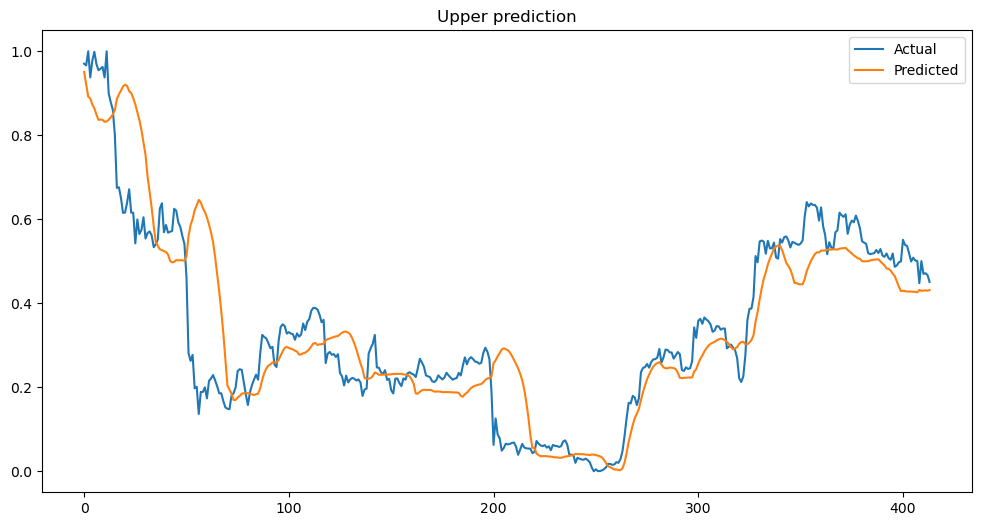

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(Y_U_test, label='Actual')
plt.plot(Y_U_pred, label='Predicted')
plt.title('Upper prediction')
plt.legend()
plt.show()

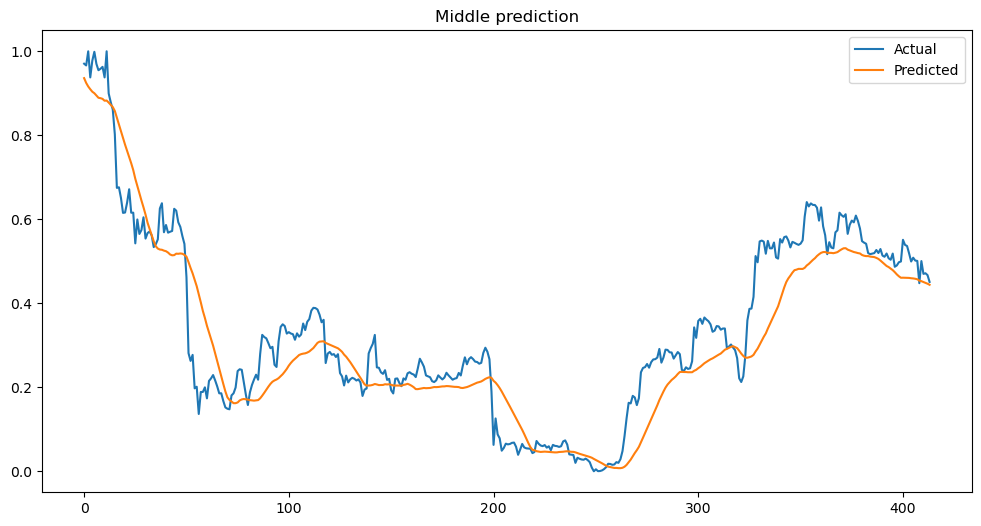

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(Y_M_test, label='Actual')
plt.plot(Y_M_pred, label='Predicted')
plt.title('Middle prediction')
plt.legend()
plt.show()

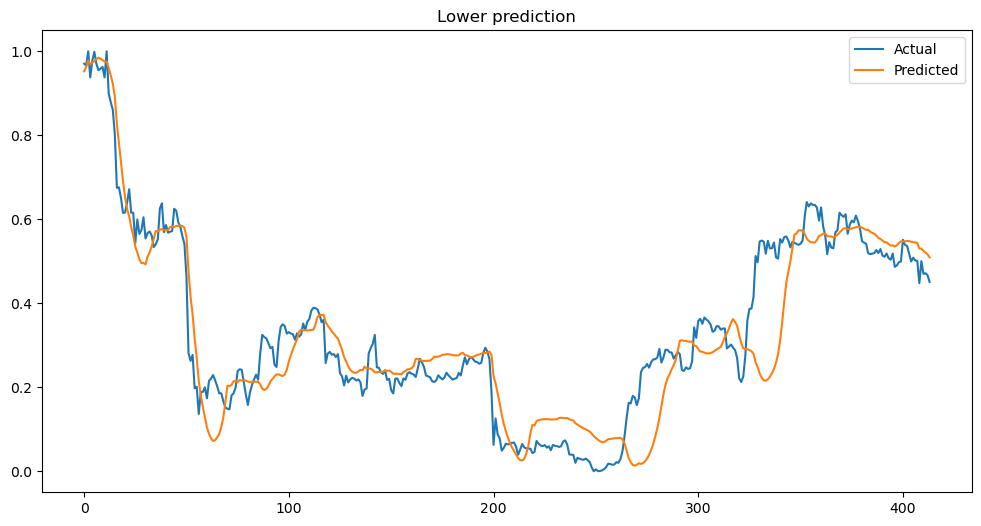

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(Y_L_test, label='Actual')
plt.plot(Y_L_pred, label='Predicted')
plt.title('Lower prediction')
plt.legend()
plt.show()

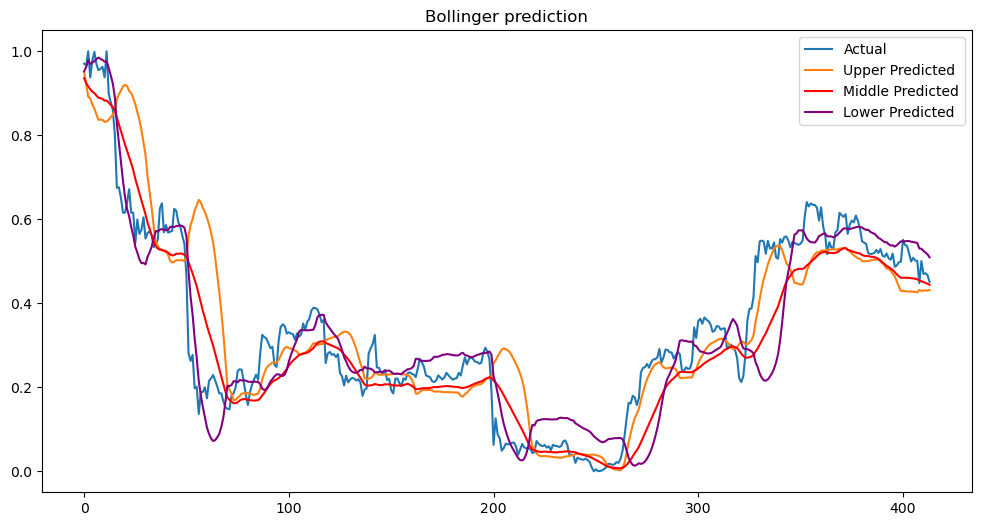

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(Y_L_test, label='Actual')
plt.plot(Y_U_pred, label='Upper Predicted')
plt.plot(Y_M_pred, label='Middle Predicted', color='red')
plt.plot(Y_L_pred, label='Lower Predicted', color='purple')
plt.title('Bollinger prediction')
plt.legend()
plt.show()